In [41]:
# import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Exploring the Data

In [42]:
# read the data

users_data = pd.read_pickle("../data/users_data_final.pkl")


In [43]:
# preview the first three rows of the data

users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [44]:
# check the number of rows and column of the dataframe

print("This dataframe has", users_data.shape[0], "number of rows")
print("This dataframe has", users_data.shape[1], "number of columns")

This dataframe has 45209 number of rows
This dataframe has 19 number of columns


In [45]:
# identify the number of catergorical columns in the dataframe

categorical_columns = list(users_data.select_dtypes(['object']).columns)
print("This dataframe has", len(categorical_columns), "number of categorical columns")

This dataframe has 7 number of categorical columns


## Feature Engineering

In [46]:
# drop the date time column

users_data.drop(['date_joined'], axis = 1, inplace = True)

In [47]:
# check if dropped

list(users_data)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'term_deposit',
 'device']

In [48]:
# list of categorical variables

categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [49]:
# drop the categorical variables

users_data.drop(categorical_columns, axis = 1, inplace = True)

In [50]:
# check if dropped

list(users_data)

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [51]:
# identify missing values

users_data.isnull().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [66]:
# METHOD 1 (Credit to Anurag): fill na with mean

values = {"number_transactions": users_data["number_transactions"].mean(), 
          "total_amount_usd": users_data["total_amount_usd"].mean()}
users_data.fillna(value=values, inplace= True)


In [67]:
# check if any missing values exist

users_data.isnull().sum()

number_transactions    0
total_amount_usd       0
age                    0
default                0
housing                0
loan                   0
duration               0
campaign               0
pdays                  0
previous               0
term_deposit           0
dtype: int64

In [14]:
# METHOD 2 : fill na with mean 
users_data["total_amount_usd"].fillna(users_data["total_amount_usd"].mean(), inplace = True) # replaces the na with mean
users_data["number_transactions"].fillna(users_data["number_transactions"].mean(), inplace = True) # replaces the na with mean


In [15]:
# check if any missing values exist

users_data.isnull().sum()

number_transactions    0
total_amount_usd       0
age                    0
default                0
housing                0
loan                   0
duration               0
campaign               0
pdays                  0
previous               0
term_deposit           0
dtype: int64

In [53]:
users_data_test.isnull().mean()

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

In [52]:
# Method 3: Using a definition to identify missing data

# https://github.com/shaq31415926/ip302/blob/main/src/identify_and_handle_missing_data.py

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.identify_and_handle_missing_data import identify_missing_data

users_data_test = pd.read_pickle("../data/users_data_final.pkl")

identify_missing_data(users_data_test)

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]
8,campaign,0.00,int64
9,term_deposit,0.00,bool


## Building our first ML model

In [68]:
# Before continuing check to see if any categorical or date time data exists

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   default              45209 non-null  bool   
 4   housing              45209 non-null  bool   
 5   loan                 45209 non-null  bool   
 6   duration             45209 non-null  int64  
 7   campaign             45209 non-null  int64  
 8   pdays                45209 non-null  int64  
 9   previous             45209 non-null  int64  
 10  term_deposit         45209 non-null  bool   
dtypes: bool(4), float64(2), int64(5)
memory usage: 2.9 MB


In [69]:
# define our features and targets

target = users_data['total_amount_usd']
features = users_data.drop(['total_amount_usd'], axis = 1)

In [70]:
# the target just consists of one variable

target.shape

(45209,)

In [71]:
# the features data frame consists of 10 features

features.shape

(45209, 10)

In [72]:
# distribution of the target - contains negative values

target.describe()

count     45209.000000
mean       1369.417751
std        2703.489610
min       -8019.000000
25%         160.000000
50%         862.000000
75%        1369.417751
max      102127.000000
Name: total_amount_usd, dtype: float64

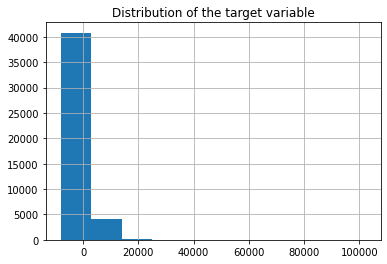

In [73]:
# Visualisation of the target variable

target.hist()
plt.title("Distribution of the target variable");

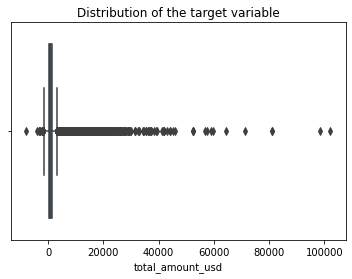

In [74]:
sns.boxplot(x = target)
plt.title("Distribution of the target variable");

In [75]:
# split into test and training data
# remember it is common to keep 80% for training data and 20% for test data
# 70 - 30 split is also fine

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2)

In [76]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# question how rows and columns does the trainin

Training Data
X_train shape: (36167, 10)
y_train shape: (36167,)


In [77]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (9042, 10)
y_test shape: (9042,)


In [78]:
# We will pick this up next week...
# Import the Linear Regression model from sklearn and call it lr

lr = LinearRegression()
lr

LinearRegression()

In [79]:
# Fit the model on the "training data"

lr.fit(X_train, y_train) 

# OUR MACHINE LEARNING MODEL

LinearRegression()

In [81]:
y_test

29891     158.000000
36299      81.000000
2065     1369.417751
33896    1369.417751
44290    1369.417751
            ...     
15417    -205.000000
43475      62.000000
28951     979.000000
18974    1369.417751
31342    1928.000000
Name: total_amount_usd, Length: 9042, dtype: float64

In [80]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred = lr.predict(X_test) 
y_pred

array([1358.0363124 , 1456.57754217, 1585.99513924, ..., 1669.85368637,
       1412.51858541, 2119.17570238])

In [82]:
print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [1358.0363124  1456.57754217 1585.99513924 1632.40606207 1282.37436161]
first five actual total amounts: [158.0, 81.0, 1369.417750639023, 1369.417750639023, 1369.417750639023]


In [83]:
# We will use r2 to evaluating the model performance.

r2_score(y_test, y_pred)

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

# Pretty close to 0. Lets see over the next few weeks we can improve the score.


0.041683113004072125